In [1]:
using Distributions
using HypothesisTests
using StatsPlots
default(fmt=:png, titlefontsize=12)

ECDF(A, x) = count(≤(x), A)/length(A)

ECDF (generic function with 1 method)

distx = Normal(0, 1) = Normal{Float64}(μ=0.0, σ=1.0)
disty = Normal(0, 1.5) = Normal{Float64}(μ=0.0, σ=1.5)
m = 25 = 25
n = 15 = 15
threshold = 0.05 = 0.05
ECDF(pval_Ftest, threshold) = 0.40731
ECDF(pval_multiple, 0.05) = 0.062033
ECDF(pval_Student, 0.05) = 0.076116
ECDF(pval_Welch, 0.05) = 0.050478


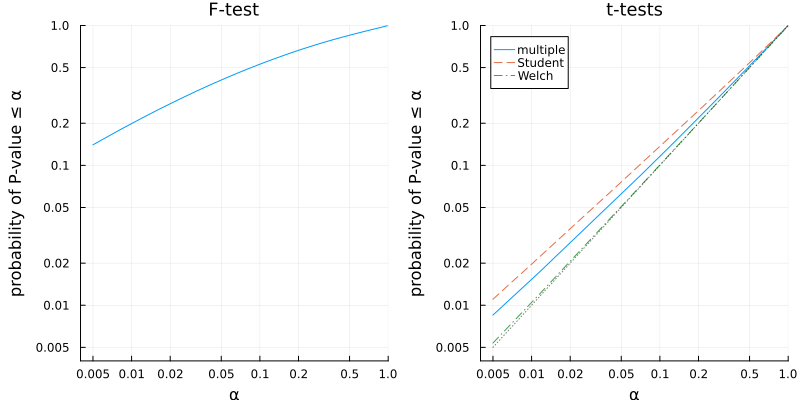

In [2]:
@show distx = Normal(0, 1)
@show disty = Normal(0, 1.5)
@show m = 25
@show n = 15
@show threshold = 0.05

L = 10^6
pval_Ftest = zeros(L)
pval_Student = zeros(L)
pval_Welch = zeros(L)
pval_multiple = zeros(L)

Threads.@threads for i in 1:L
    X = rand(distx, m)
    Y = rand(disty, n)
    pval_Ftest[i] = pvalue(VarianceFTest(X, Y))
    pval_Student[i] = pvalue(EqualVarianceTTest(X, Y))
    pval_Welch[i] = pvalue(UnequalVarianceTTest(X, Y))
    pval_multiple[i] = pval_Ftest[i] < threshold ? pval_Welch[i] : pval_Student[i]
end

@show ECDF(pval_Ftest, threshold)
@show ECDF(pval_multiple, 0.05)
@show ECDF(pval_Student, 0.05)
@show ECDF(pval_Welch, 0.05)

_tick = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
tick = (_tick, string.(_tick))

P = plot(α -> ECDF(pval_Ftest, α), 0.005, 1; label="")
plot!(xscale=:log10, yscale=:log10)
plot!(xtick=tick, ytick=tick)
plot!(xlim=(0.004, 1), ylim=(0.004, 1))
plot!(xguide="α", yguide="probability of P-value ≤ α")
title!("F-test")
plot!(size=(400, 400))

Q = plot()
plot!(α -> ECDF(pval_multiple, α), 0.005, 1; label="multiple")
plot!(α -> ECDF(pval_Student, α), 0.005, 1; label="Student", ls=:dash)
plot!(α -> ECDF(pval_Welch, α), 0.005, 1; label="Welch", ls=:dashdot)
plot!(identity, 0.005, 1; label="", ls=:dot, c=:black, alpha=0.5)
plot!(xscale=:log10, yscale=:log10)
plot!(xtick=tick, ytick=tick)
plot!(xlim=(0.004, 1), ylim=(0.004, 1))
plot!(xguide="α", yguide="probability of P-value ≤ α")
title!("t-tests")
plot!(size=(400, 400))

plot(P, Q; size=(800, 400))
plot!(leftmargin=4Plots.mm)

distx = Normal(0, 1) = Normal{Float64}(μ=0.0, σ=1.0)
disty = Normal(0, 1.5) = Normal{Float64}(μ=0.0, σ=1.5)
m = 25 = 25
n = 15 = 15
threshold = 0.4 = 0.4
ECDF(pval_Ftest, threshold) = 0.806861
ECDF(pval_multiple, 0.05) = 0.051552
ECDF(pval_Student, 0.05) = 0.075461
ECDF(pval_Welch, 0.05) = 0.050051


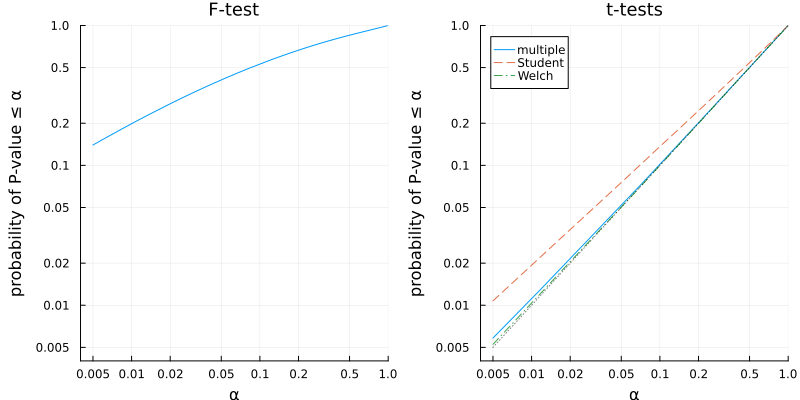

In [3]:
@show distx = Normal(0, 1)
@show disty = Normal(0, 1.5)
@show m = 25
@show n = 15
@show threshold = 0.4

L = 10^6
pval_Ftest = zeros(L)
pval_Student = zeros(L)
pval_Welch = zeros(L)
pval_multiple = zeros(L)

Threads.@threads for i in 1:L
    X = rand(distx, m)
    Y = rand(disty, n)
    pval_Ftest[i] = pvalue(VarianceFTest(X, Y))
    pval_Student[i] = pvalue(EqualVarianceTTest(X, Y))
    pval_Welch[i] = pvalue(UnequalVarianceTTest(X, Y))
    pval_multiple[i] = pval_Ftest[i] < threshold ? pval_Welch[i] : pval_Student[i]
end

@show ECDF(pval_Ftest, threshold)
@show ECDF(pval_multiple, 0.05)
@show ECDF(pval_Student, 0.05)
@show ECDF(pval_Welch, 0.05)

_tick = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
tick = (_tick, string.(_tick))

P = plot(α -> ECDF(pval_Ftest, α), 0.005, 1; label="")
plot!(xscale=:log10, yscale=:log10)
plot!(xtick=tick, ytick=tick)
plot!(xlim=(0.004, 1), ylim=(0.004, 1))
plot!(xguide="α", yguide="probability of P-value ≤ α")
title!("F-test")
plot!(size=(400, 400))

Q = plot()
plot!(α -> ECDF(pval_multiple, α), 0.005, 1; label="multiple")
plot!(α -> ECDF(pval_Student, α), 0.005, 1; label="Student", ls=:dash)
plot!(α -> ECDF(pval_Welch, α), 0.005, 1; label="Welch", ls=:dashdot)
plot!(identity, 0.005, 1; label="", ls=:dot, c=:black, alpha=0.5)
plot!(xscale=:log10, yscale=:log10)
plot!(xtick=tick, ytick=tick)
plot!(xlim=(0.004, 1), ylim=(0.004, 1))
plot!(xguide="α", yguide="probability of P-value ≤ α")
title!("t-tests")
plot!(size=(400, 400))

plot(P, Q; size=(800, 400))
plot!(leftmargin=4Plots.mm)